# モーションコプロセッサ推定のアクティビティ情報を取得する

In [1]:
# アクティビティ取得機能を使うためのモジュールを読み込む
from coremotion.cm_motion_activity_manager import *
import time

# アクティビティ情報を調べるためのMotionActivityManagerクラスのインスタンスを作る
my_motion_activity_manager = MotionActivityManager()

# 24時間/日 × 7日 にわたる歩数情報と移動距離情報を取得する
for i in range(24*7):  # i→時間、”24時間/日 × 7日間”で7日間分
    # データ取得の開始時間(現在から何秒前か) 60秒/分×60分/時間
    fromDate = NSDate.dateWithTimeIntervalSinceNow_(-60*60*(i+1))
    # データ取得の終了時間(現在から何秒前か) 60秒/分×60分/時間
    toDate = NSDate.dateWithTimeIntervalSinceNow_(-60*60*i)
    # waitをかけながら検索を実行する
    my_motion_activity_manager.query_activity_from_date_to_date(
        fromDate, toDate)
    time.sleep(1)

In [2]:
print(my_motion_activity_manager.activity_data)

[{'confidence': '2', 'stationary': '1', 'walking': '0', 'running': '0', 'automotive': '0', 'cycling': '0', 'unknown': '0'}, {'confidence': '2', 'stationary': '1', 'walking': '0', 'running': '0', 'automotive': '0', 'cycling': '0', 'unknown': '0'}, {'confidence': '2', 'stationary': '1', 'walking': '0', 'running': '0', 'automotive': '0', 'cycling': '0', 'unknown': '0'}, {'confidence': '2', 'stationary': '0', 'walking': '1', 'running': '0', 'automotive': '0', 'cycling': '0', 'unknown': '0'}, {'confidence': '2', 'stationary': '0', 'walking': '1', 'running': '0', 'automotive': '0', 'cycling': '0', 'unknown': '0'}, {'confidence': '2', 'stationary': '0', 'walking': '0', 'running': '0', 'automotive': '0', 'cycling': '0', 'unknown': '0'}, {'confidence': '2', 'stationary': '0', 'walking': '0', 'running': '0', 'automotive': '0', 'cycling': '0', 'unknown': '0'}, {'confidence': '2', 'stationary': '0', 'walking': '0', 'running': '0', 'automotive': '0', 'cycling': '0', 'unknown': '0'}, {'confidence': 

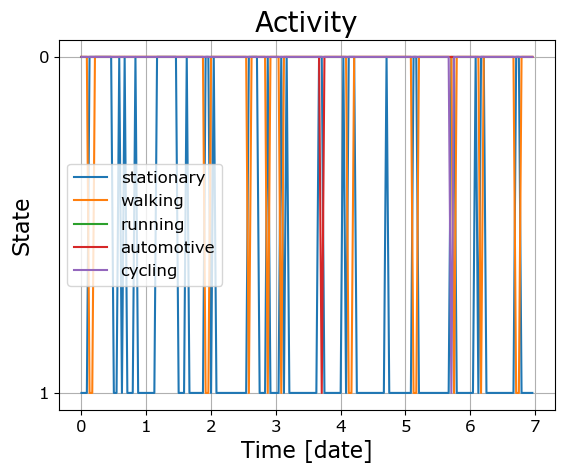

<Figure size 800x400 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 横軸を作る（横軸は”日”単位）
t = np.arange(0., 7, 1/24)
# 文字数短縮のために変数に代入しておく
data = my_motion_activity_manager.activity_data
stationary = [ma['stationary'] for ma in data]
walking = [ma['walking'] for ma in data]
running = [ma['running'] for ma in data]
automotive = [ma['automotive'] for ma in data]
cycling = [ma['cycling'] for ma in data]
# グラフを描く
plt.plot(t, stationary, label='stationary')
plt.plot(t, walking, label='walking')
plt.plot(t, running, label='running')
plt.plot(t, automotive, label='automotive')
plt.plot(t, cycling, label='cycling')
# グラフの見た目を調整する
plt.rc('legend', fontsize=12)
plt.title("Activity", fontsize=20)
plt.xlabel('Time [date]', fontsize=16)
plt.ylabel('State', fontsize=16)
plt.tick_params(labelsize=12)
plt.grid()
plt.legend()
plt.figure(figsize=[8,4])
plt.show()

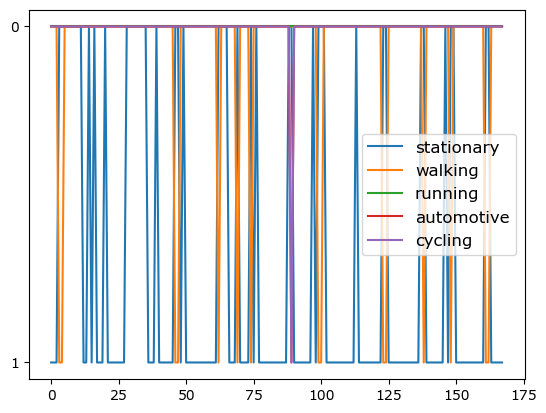

In [5]:
import numpy as np
import matplotlib.pyplot as plt

index = np.array(range(7*24))
stationary = [ma['stationary'] for ma in data]
walking = [ma['walking'] for ma in data]
running = [ma['running'] for ma in data]
automotive = [ma['automotive'] for ma in data]
cycling = [ma['cycling'] for ma in data]

fig,ax = plt.subplots()
ax.plot(index, stationary, label='stationary')
ax.plot(index, walking, label='walking')
ax.plot(index, running, label='running')
ax.plot(index, automotive, label='automotive')
ax.plot(index, automotive, label='cycling')
ax.legend()